<a href="https://colab.research.google.com/github/MaiaPiko/MaiaPiko/blob/main/52%20Recommended%20Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud


**About the Data:

The data consists of 10,000 posts that were submitted on r/suggestmeabook. It was collected via PRAW on 23/04/2023 at around noon. 

In [271]:
df = pd.read_csv('book_recommendations.csv')

In [272]:
df.describe()



,Reddit Score,Time UTC
count,972.000000,9.720000e+02
mean,13.901235,1.681782e+09
std,66.153370,3.006456e+06
min,0.000000,1.588389e+09
25%,1.000000,1.681689e+09
50%,3.000000,1.681887e+09
75%,6.000000,1.682057e+09
max,1570.000000,1.682247e+09


In [273]:
df.columns

Index(['Input', 'Output', 'Reddit Score', 'Post ID', 'URL', 'Time UTC'], dtype='object')

In [274]:
df_first_100 = df.head(100)
df_first_100

,Input,Output,Reddit Score,Post ID,URL,Time UTC
0,Post Not Showing? PLEASE READ,"Hello everyone,\n\nWe get a lot of mod mail ab...",1570,gbzbsi,https://www.reddit.com/r/suggestmeabook/commen...,1.588389e+09
1,"Deep fantasy, not too dark. I love: Sabriel, H...",Well-written fantasy with a less modern/contem...,92,12vob2h,https://www.reddit.com/r/suggestmeabook/commen...,1.682208e+09
2,A book about finding a hidden room in your house?,I sometimes get that recurring dream about dis...,38,12vomkz,https://www.reddit.com/r/suggestmeabook/commen...,1.682209e+09
3,A sci-fi where they discover something new tha...,I would prefer an open ending. I am really int...,5,12w3tlh,https://www.reddit.com/r/suggestmeabook/commen...,1.682245e+09
4,Vietnam War from the Vietnamese Perspective (N...,I've read plenty of books from the American vi...,147,12v7aw2,https://www.reddit.com/r/suggestmeabook/commen...,1.682173e+09
...,...,...,...,...,...,...
95,Book that will help me make sense of recent un...,Something happened recently that was out of my...,1,12vn9y4,https://www.reddit.com/r/suggestmeabook/commen...,1.682206e+09
96,Books like the Durrells in Corfu,I miss the Durrells in Corfu show and have bee...,5,12v9wjh,https://www.reddit.com/r/suggestmeabook/commen...,1.682178e+09
97,I’m looking for a book that has a character li...,I’m looking for a fictional book with a charac...,1,12vn0wb,https://www.reddit.com/r/suggestmeabook/commen...,1.682205e+09
98,I’m looking for a great romance novel,"I’m a girl, 16, and love lesbian romance novel...",2,12vgao4,https://www.reddit.com/r/suggestmeabook/commen...,1.682191e+09


In [275]:
df_first_100.to_csv("first_100_rows.csv", index=False)


In [276]:
text = ' '.join(df['Input'] + ' ' + df['Output'])

In [277]:


# def get_book_names(row):
#     text = row['Input'] + ' ' + row['Output']
#     # Split text into sentences
#     sentences = re.split('\.|\?|!', text)
#     # Initialize list to store book names
#     book_names = []
#     # Loop through each sentence
#     for sentence in sentences:
#         # Split sentence into words
#         words = sentence.split()
#         # Initialize list to store capitalized words before 'by'
#         potential_book_name = []
#         # Loop through each word
#         for i, word in enumerate(words):
#             # Check if word is capitalized and not 'by'
#             if word.istitle() and word.lower() != 'by':
#                 # Add word to list
#                 potential_book_name.append(word)
#             # Check if word is 'by'
#             elif word.lower() == 'by':
#                 # Join list of potential book name words and add to book names list
#                 book_names.append(' '.join(potential_book_name))
#                 # Reset potential book name list
#                 potential_book_name = []
#     # Return list of book names
#     return book_names

# # Apply the get_book_names function to each row of the DataFrame
# df['Potential Book Names'] = df.apply(get_book_names, axis=1)


In [278]:
def get_book_names(row):
    text = row['Input'] + ' ' + row['Output']
    # Split text into sentences
    sentences = re.split('\.|\?|!', text)
    # Initialize list to store book names
    book_names = []
    # Loop through each sentence
    for sentence in sentences:
        # Split sentence into words
        words = sentence.split()
        # Initialize list to store capitalized words before 'by'
        potential_book_name = []
        # Loop through each word
        for i, word in enumerate(words):
            # Check if word is capitalized and not 'by'
            if word.istitle() and word.lower() != 'by':
                # Add word to list
                potential_book_name.append(word)
            # Check if word is 'by'
            elif word.lower() == 'by':
                # Join list of potential book name words and add to book names list
                book_names.append(' '.join(potential_book_name))
                # Reset potential book name list
                potential_book_name = []
            # Check if word is enclosed in brackets
            elif (word.startswith('"') and word.endswith('"')) or (word.startswith("'") and word.endswith("'")):
                # Remove brackets and add word to book names list
                book_names.append(word[1:-1])
                # Reset potential book name list
                potential_book_name = []
            # Otherwise, reset potential book name list
            else:
                potential_book_name = []
    # Return list of book names
    return book_names

In [279]:
df['Potential Book Names'] = df.apply(get_book_names, axis=1)


In [280]:
df['Potential Book Names'].dropna()

0      [, , , , Ishmael, , , , , , , Novel, Novels, p...
1      [, , White Rat, T Kingfisher Codex Alera, Jim ...
2      [Coraline, , The Upstairs House, Coraline, *Ha...
3      [Project Hail Mary, The Expanse Series, Leviat...
4      [Kill Anything That Moves, War, War, The Storm...
                             ...                        
967                                     [Skull Shaman, ]
968     [Persuasion, Eighty Days', Travels With My Aunt]
969                                          [Score, , ]
970                                                   []
971    [, World, Crowds, , Crematory**, , The Etymolo...
Name: Potential Book Names, Length: 972, dtype: object

In [281]:
df['Potential Book Names'][0:20]

0     [, , , , Ishmael, , , , , , , Novel, Novels, p...
1     [, , White Rat, T Kingfisher Codex Alera, Jim ...
2     [Coraline, , The Upstairs House, Coraline, *Ha...
3     [Project Hail Mary, The Expanse Series, Leviat...
4     [Kill Anything That Moves, War, War, The Storm...
5                                                  [, ]
6                                                    []
7     [Good Omens, Woods, , Jennifer Crusie Maybe Me...
8                                                  [, ]
9                                                    []
10    [Hawk, , Megan Devine Broken Open, Elizabeth L...
11    [, , , , “Under A Cruel Star”, Modern World”, ...
12                       [, , The Power, “Three Women”]
13                                      [*Fever Dream*]
14                  [pictures, writer, , Of Discipline]
15                                                 [, ]
16                                                 [, ]
17                                              

In [282]:
# df['Potential Book Names'].to_csv('Potential_Book_Names.csv', index=False)

In [283]:
def get_book_names(row):
    text = row['Input'] + ' ' + row['Output']
    # Split text into sentences
    sentences = re.split('\.|\?|!', text)
    # Initialize list to store book names
    book_names = []
    # Loop through each sentence
    for sentence in sentences:
        # Split sentence into words
        words = sentence.split()
        # Initialize list to store capitalized words before 'by'
        potential_book_name = []
        # Loop through each word
        for i, word in enumerate(words):
            # Check if word is capitalized and not 'by'
            if word.istitle() and word.lower() != 'by':
                # Add word to list
                potential_book_name.append(word)
            # Check if word is 'by'
            elif word.lower() == 'by':
                # Join list of potential book name words and add to book names list
                book_names.append(' '.join(potential_book_name))
                # Reset potential book name list
                potential_book_name = []
    # Return list of book names
    return book_names

# Apply the get_book_names function to each row of the DataFrame
df['Potential Book Names'] = df.apply(get_book_names, axis=1)

In [284]:
df['Potential Book Names'].sample

<bound method NDFrame.sample of 0      [We, On, If, If, I Hitchhikers Guide Ishmael, ...
1      [Vorkosigan, Lois Mcmaster Bujold World Five, ...
2      [Coraline, , The Upstairs House, Coraline, I *...
3      [Project Hail Mary, Andy Weir The Expanse Seri...
4      [The Mountains Sing The Sorrow War, Bảo Ninh K...
                             ...                        
967    [Stonehenge People Wolf (I Beyond Sea Ice The ...
968    [Persuasion, Dracula Portrait Dorian Grey I 'A...
969                             [The Body Keeps Score, ]
970                                                   []
971    [How Iceland Changed World, The Delusions Crow...
Name: Potential Book Names, Length: 972, dtype: object>

In [285]:
potential_list = df['Potential Book Names'].tolist()


In [286]:
potential_list[:20]

[['We',
  'On',
  'If',
  'If',
  'I Hitchhikers Guide Ishmael',
  'My',
  'Sorry, If Carré Deighton Fleming Herron Macintyre Beyond Enkription, The Burlington Files',
  'Beyond Enkription The Burlington Files',
  'After Caribbean',
  'In Bill',
  'I Novel',
  'These Novels Novels',
  'Calling',
  'You',
  'Yours',
  '',
  'Weird',
  'If'],
 ['Vorkosigan',
  'Lois Mcmaster Bujold World Five',
  'Lois Bujold World White Rat',
  'T Kingfisher Codex Alera',
  'Jim Butcher The Queens Thief',
  'Meghan Whalen Turner Matthew Swift',
  'Kate Griffin Scholomance',
  'Naomi Novik Chronicles Alice',
  'Christine Henry Finder',
  'Suzanne Palmer Chequey Files',
  "Daniel O'Malley Detective Inspector Chen",
  'Liz Williams The Amber',
  'As Sabriel His Dark Materials, I Raksura',
  'Also The Thief',
  'The Earthsea',
  'Seconding The World Five Gods',
  'The Riyria Revelations',
  'If The Name Wind'],
 ['Coraline',
  '',
  'The Upstairs House',
  'Coraline',
  'I *Haunted*',
  'Mona Promised Land'

In [287]:
potential_list_combined= []
for lst in potential_list:
    potential_list_combined.extend(lst)


In [288]:
print(potential_list_combined)

['We', 'On', 'If', 'If', 'I Hitchhikers Guide Ishmael', 'My', 'Sorry, If Carré Deighton Fleming Herron Macintyre Beyond Enkription, The Burlington Files', 'Beyond Enkription The Burlington Files', 'After Caribbean', 'In Bill', 'I Novel', 'These Novels Novels', 'Calling', 'You', 'Yours', '', 'Weird', 'If', 'Vorkosigan', 'Lois Mcmaster Bujold World Five', 'Lois Bujold World White Rat', 'T Kingfisher Codex Alera', 'Jim Butcher The Queens Thief', 'Meghan Whalen Turner Matthew Swift', 'Kate Griffin Scholomance', 'Naomi Novik Chronicles Alice', 'Christine Henry Finder', 'Suzanne Palmer Chequey Files', "Daniel O'Malley Detective Inspector Chen", 'Liz Williams The Amber', 'As Sabriel His Dark Materials, I Raksura', 'Also The Thief', 'The Earthsea', 'Seconding The World Five Gods', 'The Riyria Revelations', 'If The Name Wind', 'Coraline', '', 'The Upstairs House', 'Coraline', 'I *Haunted*', 'Mona Promised Land', 'Romanian Solenoid', 'The Velvet Room', 'Fairytale', 'Not The', '*Singularity*', 'P

In [289]:
potential = potential_list_combined

In [290]:
for i in range(len(potential)):
    potential[i] = potential[i].replace('*', '')
    potential[i] = potential[i].replace(',', '')
    potential[i] = potential[i].replace('{', '')
    potential[i] = potential[i].replace('}', '')
    potential[i] = potential[i].replace('[', '')
    potential[i] = potential[i].replace(']', '')
    potential[i] = potential[i].replace(')', '')
    potential[i] = potential[i].replace('(', '')
    potential[i] = potential[i].replace('Also:', '')



In [291]:
remove = ["We","I", "On", "If", "My", "You", "They","Yours","His", "The","So", "In", "Those", "Also", "It", "A", "I I",
          "Anything", "All", "Not", "And", "He", "Any", "Books", "Do", "But", "Night", "Both", "This", "She", "Looking", "How", "Or", 
          "Some", "If I", "Basically", "Read", "Oh", "Maybe", "There", "Have", "Most", "One", "These", "Are", "For", "Is",
          "An", "Felt", "That", "Did","As", "English", "Something", "However", 'Thank','America','What','Love','Great','Just','Girl','Every','Story','When',
          'The I', 'Suggest','First','Game','Death','Other','Under','Long','Really','After',"Everything", 'Check', 'Children', 'Reading', "Jane Austen", "Naomi Novik",
          "Martha Wells", "Highly", "Main","Dostoevsky", "Especially","Don Quixote", "Everyone", "A", "Written", "Bonus", "Bear", "Diary"
          "Without"]
for item in remove:
  if item in potential:
    potential = [x for x in potential if x != item]


In [292]:
potential = list(filter(bool, potential))

In [293]:
for i in range(len(potential)):
    potential[i] = potential[i].replace('Amal El-Mohtar Max Gladstone- The Darkness Outside Us', 'The Darkness Outside Us')
    potential[i] = potential[i].replace('John Waller Caravaggio: A Life Sacred Profane', 'A Life Sacred Profane')
    potential[i] = potential[i].replace('Whisperer: My Life Herd African Wild --Lawrence Anthony Earth Abides', 'Whisperer: My Life Herd African Wild')
    potential[i] = potential[i].replace('Sayaka Murata (Japan) The Harpy', 'The Harpy')
    potential[i] = potential[i].replace('Lina Wolff (Spain) Broken Summer', 'Broken Summer')
    potential[i] = potential[i].replace('Valeria Luiselli (Mexico) Solenoid', 'Solenoid')

In [294]:
count_dict = {}
for item in potential:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1

print(count_dict)

{'I Hitchhikers Guide Ishmael': 1, 'Sorry If Carré Deighton Fleming Herron Macintyre Beyond Enkription The Burlington Files': 1, 'Beyond Enkription The Burlington Files': 1, 'After Caribbean': 1, 'In Bill': 1, 'I Novel': 1, 'These Novels Novels': 1, 'Calling': 1, 'Weird': 1, 'Vorkosigan': 1, 'Lois Mcmaster Bujold World Five': 1, 'Lois Bujold World White Rat': 1, 'T Kingfisher Codex Alera': 2, 'Jim Butcher The Queens Thief': 1, 'Meghan Whalen Turner Matthew Swift': 1, 'Kate Griffin Scholomance': 2, 'Naomi Novik Chronicles Alice': 1, 'Christine Henry Finder': 1, 'Suzanne Palmer Chequey Files': 1, "Daniel O'Malley Detective Inspector Chen": 1, 'Liz Williams The Amber': 1, 'As Sabriel His Dark Materials I Raksura': 1, 'Also The Thief': 2, 'The Earthsea': 1, 'Seconding The World Five Gods': 1, 'The Riyria Revelations': 1, 'If The Name Wind': 1, 'Coraline': 3, 'The Upstairs House': 1, 'I Haunted': 1, 'Mona Promised Land': 1, 'Romanian Solenoid': 1, 'The Velvet Room': 1, 'Fairytale': 1, 'Not 

In [295]:
sorted_dict = dict(sorted(count_dict.items(), key=lambda x: x[1], reverse=True))


In [296]:
potential_plus=[]
for key, value in list(sorted_dict.items()):
    if value > 1:
      potential_plus.append(key)

    print(key, value)

Streaming output truncated to the last 5000 lines.
Another 'Invisible Monsters' 1
 Ghostwritten 1
House Leaves I I Exercises Style 1
Another "Bunny" 1
Off Once Upon A River 1
Celia Fairies 1
In American Psycho 1
If Boy Parts 1
Tales Death Her Hands 1
Not I Am The Messenger 1
Rusalka 1
“Miss Home Peculiar Children” 1
Woman Edge Time 1
Insomnia 1
The Woman Window 1
Finn The Breakdown 1
I I Annialation 1
The Good People 1
Bruce The Drowned Girl 1
Paradise Rot 1
To Like Lighting 1
Ada Palmer Freshwater 1
Wildthorn 1
Along 1
Jo Walton The Drowning Girl 1
Beasts Extraordinary Circumstance 1
Lathe Heaven Ursula K The Kappa Child 1
Mind Winter 1
Laura Kasischke Peace Pipe 1
Aliya Whitely Little Darlings 1
Melanie Golding A Head Full Ghosts 1
Paul Tremblay Night Film 1
I Pale Fire 1
In Lunar Park 1
Leaves Grass 1
Walt Whitman 1
You Mayakovsky 1
Just This 1
Rivers London Alex Verus 1
For David Mogo Godhunter 1
The Apprentice Farseer Chronicles 1
The “Memory Sorrow Thorn” 1
Okay Legend Drizzt 1
I

In [297]:
potential_plus[:4]

['Project Hail Mary', 'Black Water', 'Zen Cho Ninth House', 'The Wasp Factory']

In [298]:
df.columns


Index(['Input', 'Output', 'Reddit Score', 'Post ID', 'URL', 'Time UTC',
       'Potential Book Names'],
      dtype='object')

In [299]:
book_counts = {}  # create an empty dictionary to hold the book counts

for book in potential_plus:
    count = 0  # initialize the count to 0
    for index, row in df.iterrows():
        if book in row.Input:
            count += row.Input.count(book)
        elif book in row.Output:
            count += row.Output.count(book)
    if count > 0:
        book_counts[book] = count  # update the book count if the book was found




In [300]:
print(book_counts)

{'Project Hail Mary': 63, 'Black Water': 25, 'The Wasp Factory': 21, 'Dark Matter': 26, 'Your Name': 6, 'Circe': 37, 'Hopped Up': 11, 'Sharp Objects': 20, 'The Sympathizer': 10, 'Outlander': 23, 'The Hike': 10, 'Rebecca': 70, 'Pretty': 52, 'Demon Copperhead': 9, 'Mexican Gothic': 12, 'Eragon': 18, 'Paper Castles': 20, 'Come Undone': 7, 'The Sparrow': 12, 'In Cold Blood': 8, 'It I': 2, 'If We Were Villains': 11, 'Educated': 24, 'Rage': 12, 'A Little Life': 47, 'Coraline': 7, 'Remarkably Bright Creatures': 9, 'Kindred': 14, 'The Last Man': 5, 'The Stranger': 18, 'Scheming': 3, 'Murderbot': 46, 'Bunny': 15, 'The Vegetarian': 8, 'The Bobiverse': 4, 'The Murderbot Diaries': 12, 'The Broken Earth': 15, 'The Giver': 20, 'The Martian': 32, 'The Darkness Outside Us': 8, 'Station Eleven': 27, 'Melmoth': 5, 'Born A Crime': 6, 'Glad My Mom Died': 18, 'The Road': 36, 'The Shipping News': 4, 'The Da Vinci Code': 3, 'Nightcrawling': 5, 'Mistborn': 24, 'The Radium Girls': 5, 'Haunted': 19, 'Red Rising

In [301]:
sorted_books = sorted(book_counts.items(), key=lambda x: x[1], reverse=True)


In [302]:
sorted_books[:4]

[('Rebecca', 70), ('Project Hail Mary', 63), ('Bird', 54), ('Pretty', 52)]

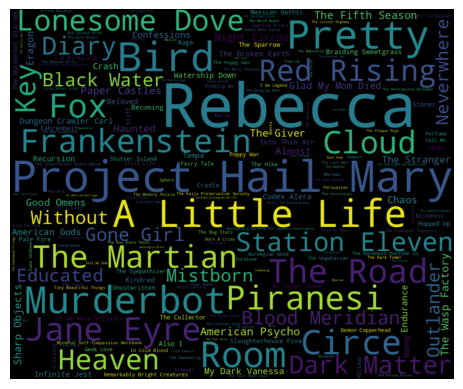

In [303]:

# Create a dictionary of book names and their frequency
books = dict(sorted_books)

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=1000).generate_from_frequencies(books)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('book_wordcloud-model2-.png', dpi=300, bbox_inches='tight')

plt.show()

{'Rebecca': 70, 'Project Hail Mary': 63, 'Bird': 54, 'Pretty': 52, 'A Little Life': 47, 'Murderbot': 46, 'Room': 42, 'Circe': 37, 'The Road': 36, 'Piranesi': 36, 'Fox': 36, 'Jane Eyre': 35, 'Frankenstein': 34, 'The Martian': 32, 'Cloud': 32, 'Red Rising': 30, 'Lonesome Dove': 30, 'Heaven': 28, 'Key': 28, 'Station Eleven': 27, 'Dark Matter': 26, 'Diary': 26, 'Blood Meridian': 26, 'Black Water': 25, 'Without': 25, 'Gone Girl': 25, 'Educated': 24, 'Mistborn': 24, 'Outlander': 23, 'Neverwhere': 23, 'American Psycho': 22, 'The Wasp Factory': 21, 'The Fifth Season': 21, 'Sharp Objects': 20, 'Paper Castles': 20, 'The Giver': 20, 'Night Circus': 20, 'Haunted': 19, 'Chaos': 19, 'Good Omens': 19, 'Almost': 19, 'Eragon': 18, 'The Stranger': 18, 'Glad My Mom Died': 18, 'My Dark Vanessa': 18, 'Endurance': 18, 'American Gods': 18, 'Confessions': 18, 'Crash': 17, 'Dungeon Crawler Carl': 16, 'Recursion': 16, 'Bunny': 15}


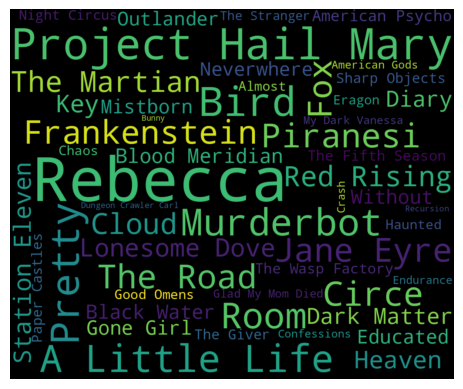

In [304]:
# Create a dictionary of book names and their frequency
books = dict(sorted_books[:52])
print(books)
# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=1000).generate_from_frequencies(books)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('book_wordcloud-model2-52.png', dpi=300, bbox_inches='tight')

plt.show()

In [305]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)

<ipython-input-306-864bcc171cea>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(index, fontsize=24)


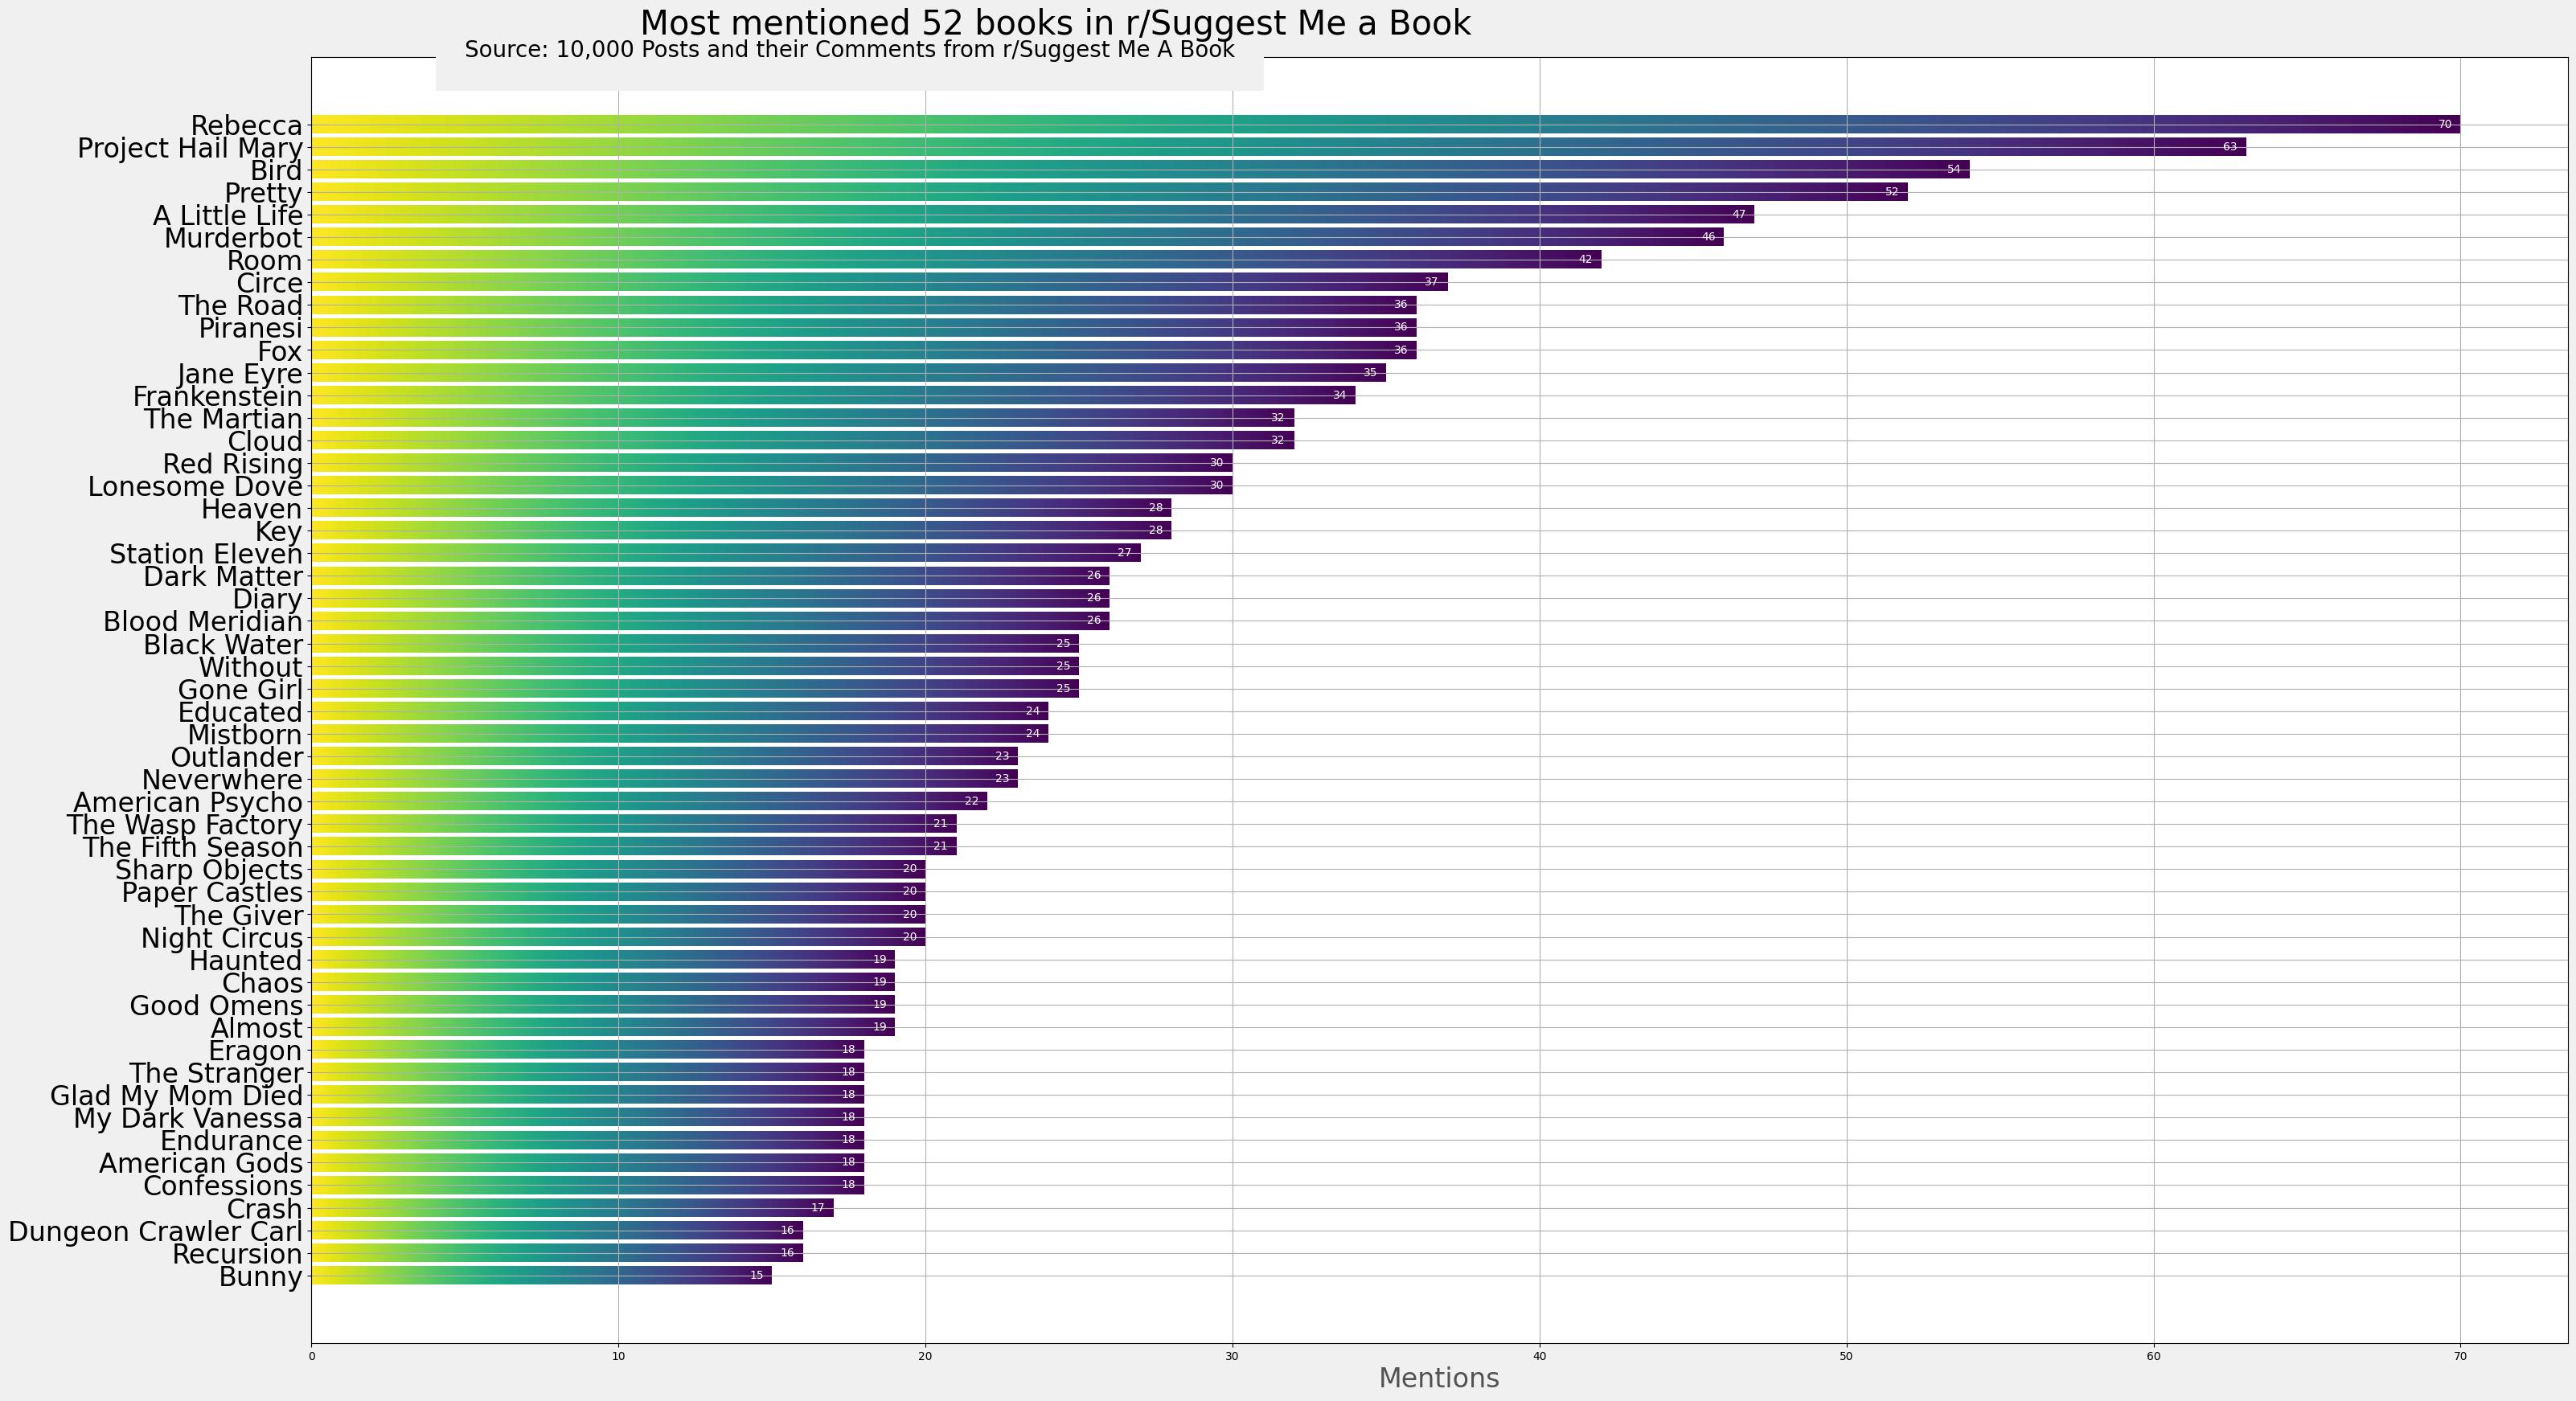

In [306]:

data = sorted_books[:52][::-1]  # Reverse the order of the data list

# Separate the titles and counts into separate lists
titles = [item[0] for item in data]
counts = [item[1] for item in data]

index = titles
values = counts
plot_title = 'Most mentioned 52 books in r/Suggest Me a Book'
title_size = 30
subtitle = 'Source: 10,000 Posts and their Comments from r/Suggest Me A Book'
x_label = 'Mentions'
filename = 'barh-plot'

fig, ax = plt.subplots(figsize=(30,20), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

bar = ax.barh(index, values)
gradientbars(bar)  # Call gradientbars function here
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

ax.grid(zorder=0)

        
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -20
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
        
# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'), fontsize=20)

#Set x-label and y-label
ax.set_yticklabels(index, fontsize=24)

# ax.set_ylabel('Books', fontsize=24)
ax.set_xlabel(x_label, color='#525252', fontsize=24)
plt.savefig('bars52-model2.png', dpi=300, bbox_inches='tight')
